### Setting up the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This section is to get player season averages for the 2022-23 NBA regular season.

In [2]:
player2023 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2023_per_game.html')

In [3]:
player2023[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [4]:
player2023_df = player2023[0]

In [5]:
dataTypeDict = dict(player2023_df.dtypes)
print(dataTypeDict)

{'Rk': dtype('O'), 'Player': dtype('O'), 'Pos': dtype('O'), 'Age': dtype('O'), 'Tm': dtype('O'), 'G': dtype('O'), 'GS': dtype('O'), 'MP': dtype('O'), 'FG': dtype('O'), 'FGA': dtype('O'), 'FG%': dtype('O'), '3P': dtype('O'), '3PA': dtype('O'), '3P%': dtype('O'), '2P': dtype('O'), '2PA': dtype('O'), '2P%': dtype('O'), 'eFG%': dtype('O'), 'FT': dtype('O'), 'FTA': dtype('O'), 'FT%': dtype('O'), 'ORB': dtype('O'), 'DRB': dtype('O'), 'TRB': dtype('O'), 'AST': dtype('O'), 'STL': dtype('O'), 'BLK': dtype('O'), 'TOV': dtype('O'), 'PF': dtype('O'), 'PTS': dtype('O')}


In [6]:
player2023_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
player_pos = player2023_df[['Player','Pos']].copy()
player_pos

,Player,Pos
0,Precious Achiuwa,C
1,Steven Adams,C
2,Bam Adebayo,C
3,Ochai Agbaji,SG
4,Santi Aldama,PF
...,...,...
700,Thaddeus Young,PF
701,Trae Young,PG
702,Omer Yurtseven,C
703,Cody Zeller,C


In [8]:
player2023_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']] = player2023_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(lambda col:pd.to_numeric(col,errors='coerce'))

In [9]:
dataTypeDict = dict(player2023_df.dtypes)
print(dataTypeDict)

{'Rk': dtype('O'), 'Player': dtype('O'), 'Pos': dtype('O'), 'Age': dtype('O'), 'Tm': dtype('O'), 'G': dtype('float64'), 'GS': dtype('float64'), 'MP': dtype('float64'), 'FG': dtype('float64'), 'FGA': dtype('float64'), 'FG%': dtype('float64'), '3P': dtype('float64'), '3PA': dtype('float64'), '3P%': dtype('float64'), '2P': dtype('float64'), '2PA': dtype('float64'), '2P%': dtype('float64'), 'eFG%': dtype('float64'), 'FT': dtype('float64'), 'FTA': dtype('float64'), 'FT%': dtype('float64'), 'ORB': dtype('float64'), 'DRB': dtype('float64'), 'TRB': dtype('float64'), 'AST': dtype('float64'), 'STL': dtype('float64'), 'BLK': dtype('float64'), 'TOV': dtype('float64'), 'PF': dtype('float64'), 'PTS': dtype('float64')}


In [10]:
player2023_df.columns[5:]

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [11]:
columns = player2023_df.columns[5:]

This is to group all rows by player name so that players who played on more than one team for the season (if they were traded) are recorded in one row and have the combined averages from their time on both teams.

In [12]:
player2023_df = player2023_df.groupby('Player',as_index=False)[columns].mean()

In [13]:
player2023_df

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,35.0,1.0,9.9,1.500000,3.600000,0.424000,1.300000,3.000000,0.419,...,1.000,0.200000,1.1,1.300000,0.600000,0.200000,0.0,0.300000,0.9,4.4
1,A.J. Lawson,10.0,0.0,5.6,1.333333,2.333333,0.662667,0.466667,1.166667,0.400,...,0.250,0.266667,1.0,1.266667,0.066667,0.066667,0.0,0.133333,0.8,3.2
2,AJ Griffin,72.0,12.0,19.5,3.400000,7.400000,0.465000,1.400000,3.600000,0.390,...,0.894,0.500000,1.6,2.100000,1.000000,0.600000,0.2,0.600000,1.2,8.9
3,Aaron Gordon,68.0,68.0,30.2,6.300000,11.200000,0.564000,0.900000,2.500000,0.347,...,0.608,2.400000,4.1,6.600000,3.000000,0.800000,0.8,1.400000,1.9,16.3
4,Aaron Holiday,63.0,6.0,13.4,1.500000,3.500000,0.418000,0.600000,1.400000,0.409,...,0.844,0.400000,0.8,1.200000,1.400000,0.600000,0.2,0.600000,1.3,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Zach Collins,63.0,26.0,22.9,4.500000,8.700000,0.518000,0.900000,2.300000,0.374,...,0.761,1.800000,4.5,6.400000,2.900000,0.600000,0.8,2.000000,3.2,11.6
536,Zach LaVine,77.0,77.0,35.9,8.700000,18.000000,0.485000,2.600000,7.100000,0.375,...,0.848,0.500000,3.9,4.500000,4.200000,0.900000,0.2,2.500000,2.1,24.8
537,Zeke Nnaji,53.0,5.0,13.7,2.100000,3.700000,0.561000,0.300000,1.200000,0.262,...,0.645,1.200000,1.4,2.600000,0.300000,0.300000,0.4,0.600000,2.0,5.2
538,Ziaire Williams,37.0,4.0,15.2,2.300000,5.300000,0.429000,0.700000,2.600000,0.258,...,0.773,0.400000,1.7,2.100000,0.900000,0.400000,0.2,1.000000,1.6,5.7


In [14]:
player2023_df = pd.merge(player_pos,player2023_df,on='Player',how='outer')
player2023_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,2.0,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,42.0,42.0,27.0,3.7,6.3,0.597,0.0,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,75.0,75.0,34.6,8.0,14.9,0.540,0.0,0.2,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,59.0,22.0,20.5,2.8,6.5,0.427,1.4,3.9,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,77.0,20.0,21.8,3.2,6.8,0.470,1.2,3.5,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Thaddeus Young,PF,54.0,9.0,14.7,2.0,3.7,0.545,0.1,0.6,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,Trae Young,PG,73.0,73.0,34.8,8.2,19.0,0.429,2.1,6.3,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,Omer Yurtseven,C,9.0,0.0,9.2,1.8,3.0,0.593,0.3,0.8,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,Cody Zeller,C,15.0,2.0,14.5,2.5,3.9,0.627,0.0,0.1,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [15]:
player2023_df.sort_values(by='FG%',ascending=False)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
592,Chris Silva,PF,1.0,0.0,3.0,1.0,1.0,1.000,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
367,Braxton Key,SF,3.0,0.0,3.0,0.3,0.3,1.000,0.0,0.0,...,1.00,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,1.3
21,Udoka Azubuike,C,36.0,4.0,10.0,1.6,2.0,0.819,0.0,0.0,...,0.35,0.9,2.4,3.3,0.3,0.2,0.4,0.5,0.9,3.5
187,Tyler Dorsey,SF,3.0,0.0,2.7,1.3,1.7,0.800,0.3,0.7,...,NaN,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,3.0
597,Jericho Sims,C,52.0,16.0,15.6,1.6,2.1,0.776,0.0,0.0,...,0.75,1.9,2.8,4.7,0.5,0.3,0.5,0.5,1.8,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Player,Pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Player,Pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Player,Pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,Michael Foster Jr.,PF,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
player2023_df = player2023_df.replace(np.nan,0)

In [17]:
# seeing how many games have already been played in the season
total_games_played = max(player2023_df['G'])
total_games_played

82.0

This is to get only players who have played more than half the games during the season as the season goes on. The total_games_played variable updates each time the code is run so will update as the season goes on. I want to get players that have a large enough sample size for their averages in order to accurately rank them for selection.

In [18]:
test = [player2023_df.values[i] for i in range(0,len(player2023_df)) if player2023_df['G'][i]>=(total_games_played/2)]

In [19]:
active_player_df = pd.DataFrame(test)

In [20]:
active_player_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Precious Achiuwa,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,2.0,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,42.0,42.0,27.0,3.7,6.3,0.597,0.0,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,75.0,75.0,34.6,8.0,14.9,0.540,0.0,0.2,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,59.0,22.0,20.5,2.8,6.5,0.427,1.4,3.9,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,77.0,20.0,21.8,3.2,6.8,0.470,1.2,3.5,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Christian Wood,C,67.0,17.0,25.9,5.9,11.5,0.515,1.6,4.2,...,0.772,1.3,6.0,7.3,1.8,0.4,1.1,1.8,2.5,16.6
375,Delon Wright,PG,50.0,14.0,24.4,2.8,5.8,0.474,0.8,2.4,...,0.867,1.2,2.4,3.6,3.9,1.8,0.3,0.9,1.2,7.4
376,Thaddeus Young,PF,54.0,9.0,14.7,2.0,3.7,0.545,0.1,0.6,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
377,Trae Young,PG,73.0,73.0,34.8,8.2,19.0,0.429,2.1,6.3,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2


In [21]:
active_player_df.columns = ['Player', 'Pos','G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [22]:
active_player_df['G'].min()

41.0

In [23]:
active_player_df.drop_duplicates('Player',inplace=True)

In [24]:
active_player_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,2.0,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,42.0,42.0,27.0,3.7,6.3,0.597,0.0,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,75.0,75.0,34.6,8.0,14.9,0.540,0.0,0.2,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,59.0,22.0,20.5,2.8,6.5,0.427,1.4,3.9,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,77.0,20.0,21.8,3.2,6.8,0.470,1.2,3.5,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Christian Wood,C,67.0,17.0,25.9,5.9,11.5,0.515,1.6,4.2,...,0.772,1.3,6.0,7.3,1.8,0.4,1.1,1.8,2.5,16.6
375,Delon Wright,PG,50.0,14.0,24.4,2.8,5.8,0.474,0.8,2.4,...,0.867,1.2,2.4,3.6,3.9,1.8,0.3,0.9,1.2,7.4
376,Thaddeus Young,PF,54.0,9.0,14.7,2.0,3.7,0.545,0.1,0.6,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
377,Trae Young,PG,73.0,73.0,34.8,8.2,19.0,0.429,2.1,6.3,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2


In [25]:
player2023_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,2.0,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,42.0,42.0,27.0,3.7,6.3,0.597,0.0,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,75.0,75.0,34.6,8.0,14.9,0.540,0.0,0.2,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,59.0,22.0,20.5,2.8,6.5,0.427,1.4,3.9,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,77.0,20.0,21.8,3.2,6.8,0.470,1.2,3.5,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Thaddeus Young,PF,54.0,9.0,14.7,2.0,3.7,0.545,0.1,0.6,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,Trae Young,PG,73.0,73.0,34.8,8.2,19.0,0.429,2.1,6.3,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,Omer Yurtseven,C,9.0,0.0,9.2,1.8,3.0,0.593,0.3,0.8,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,Cody Zeller,C,15.0,2.0,14.5,2.5,3.9,0.627,0.0,0.1,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


The following statistics are stats that I have created for personal use. The most important one is the YAHOO stat which is meant to act as a quick and easy way to view player value in a head to head Yahoo fantasy league. It is created by normalizing the values of each scored statistic in Yahoo head to head fantasy basketball, and then taking the sum of those statistics, minus the normalized turnover value (since you don't want a high value for this). Since there are 10 scored statistics, the average YAHOO value would be 8 (9 - 1 for turnovers). FG% and FT% are calculated the way they are because the number of attempts taken also matters. For example, a player who has a 90% FT% and takes 10 FTA per game would be more valuable than a player who has a 90% FT% and only takes 2 FTA per game. The same goes for FG% and FGA.

In [26]:
player2023_df['2WAY'] = ((player2023_df['PTS']/player2023_df['PTS'].mean())+(player2023_df['AST']/player2023_df['AST'].mean())+(player2023_df['TRB']/player2023_df['TRB'].mean())+(player2023_df['STL']/player2023_df['STL'].mean())+(player2023_df['BLK']/player2023_df['BLK'].mean())-(player2023_df['TOV']/player2023_df['TOV'].mean()))

In [27]:
player2023_df['YAHOO'] = ((player2023_df['FG']/player2023_df['FG'].mean()))+((player2023_df['FGA']**player2023_df['FG%'])/(player2023_df['FGA'].mean()**player2023_df['FG%'].mean()))+((player2023_df['FTA']**player2023_df['FT%'])/(player2023_df['FTA'].mean()**player2023_df['FT%'].mean()))+(player2023_df['3P']/player2023_df['3P'].mean())+(player2023_df['PTS']/player2023_df['PTS'].mean())+(player2023_df['TRB']/player2023_df['TRB'].mean())+(player2023_df['AST']/player2023_df['AST'].mean())+(player2023_df['STL']/player2023_df['STL'].mean())+(player2023_df['BLK']/player2023_df['BLK'].mean())-(player2023_df['TOV']/player2023_df['TOV'].mean())

In [28]:
active_player_df['2WAY'] = ((active_player_df['PTS']/active_player_df['PTS'].mean())+(active_player_df['AST']/active_player_df['AST'].mean())+(active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean()))

In [29]:
# Old FG% and FT% method--> worse
#active_player_df['YAHOO'] = ((active_player_df['FG']/active_player_df['FG'].mean()))+((active_player_df['FG%']*active_player_df['FG'])/(active_player_df['FG%'].mean()*active_player_df['FG'].mean()))+((active_player_df['FT%']*active_player_df['FT'])/(active_player_df['FT%'].mean()*active_player_df['FT'].mean()))+(active_player_df['3P']/active_player_df['3P'].mean())+(active_player_df['PTS']/active_player_df['PTS'].mean())+(active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['AST']/active_player_df['AST'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean())

In [30]:
active_player_df['YAHOO'] = ((active_player_df['FG']/active_player_df['FG'].mean()))+((active_player_df['FGA']**active_player_df['FG%'])/(active_player_df['FGA'].mean()**active_player_df['FG%'].mean()))+((active_player_df['FTA']**active_player_df['FT%'])/(active_player_df['FTA'].mean()**active_player_df['FT%'].mean()))+(active_player_df['3P']/active_player_df['3P'].mean())+(active_player_df['PTS']/active_player_df['PTS'].mean())+(active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['AST']/active_player_df['AST'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean())

In [31]:
active_player_df['Defense'] = (active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean())

In [32]:
active_player_df['FG/FT%'] = (active_player_df['FG%']+active_player_df['FT%'])/2

In [33]:
active_player_df['FG%'].mean()*active_player_df['FG'].mean()

2.0508624359258114

In [34]:
active_player_df['FG%'].mean(),active_player_df['FG'].mean()

(0.47992558613659536, 4.273292558613659)

In [35]:
active_player_df['YAHOO'].mean()

7.948191055046875

### Getting Active Players

I made this function to make it easier to get a specific player you want to see

In [36]:
def get_player(player):
  return active_player_df[active_player_df['Player'].str.contains(player)]

In [37]:
get_player('Kyle Lowry')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
208,Kyle Lowry,PG,55.0,44.0,31.2,3.6,8.8,0.404,1.9,5.6,...,5.1,1.0,0.4,1.9,2.6,11.2,4.687364,9.008444,1.754302,0.6315


### Automated Team Selector

This function automatically selects the best NBA team based on each player's YAHOO statistic. For Yahoo Fantasy NBA H2H leagues (at least my league) you are allowed to select 2 centers, 3 guards, 3 forwards, and then 5 utility players (players of any position). That is why the choose_my_team function selects the top 2 centers, top 3 guards, top 3 forwards, and then the top n players that are left over after getting rid of the already selected players. The number of players selected can be adjusted to whatever you want.

In [38]:
def choose_my_team(df):
  center = df[df['Pos'].str.contains('C')].sort_values('YAHOO',ascending=False).drop_duplicates().head(2)
  guards = df[df['Pos'].str.contains('G')].sort_values('YAHOO',ascending=False).drop_duplicates().head(3)
  forwards = df[df['Pos'].str.contains('F')].sort_values('YAHOO',ascending=False).drop_duplicates().head(3)
  util = df.sort_values('YAHOO',ascending=False).drop_duplicates().head(15)
  final_team = pd.concat([center, guards,forwards], axis=0)
  util = util.drop(util.index[util['Player'].isin(final_team['Player'])])
  #df = df.drop(df.index[df['colA'].isin([1.0, 2.0, 3.0])])
  final_team = pd.concat([center, guards,forwards,util], axis=0)
  #final_team = final_team.append(util[util.isin(final_team)==False])
  return final_team.sort_values(by='YAHOO',ascending=False)

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
choose_my_team(active_player_df).sort_values(by='YAHOO',ascending=False)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
94,Joel Embiid,C,66.0,66.0,34.6,11.0,20.1,0.548,1.0,3.0,0.330,10.0,17.1,0.587,0.573,10.0,11.7,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,9.301643,18.653709,4.844781,0.7025
86,Luka Dončić,PG,66.0,66.0,36.2,10.9,22.0,0.496,2.8,8.2,0.342,8.1,13.8,0.588,0.560,7.8,10.5,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,8.157799,17.472658,2.288859,0.6190
111,Shai Gilgeous-Alexander,PG,68.0,68.0,35.5,10.4,20.3,0.510,0.9,2.5,0.345,9.5,17.8,0.533,0.531,9.8,10.9,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,8.171502,17.347269,3.356434,0.7075
200,Damian Lillard,PG,58.0,58.0,36.3,9.6,20.7,0.463,4.2,11.3,0.371,5.4,9.4,0.574,0.564,8.8,9.6,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,6.113838,17.154411,0.533142,0.6885
78,Anthony Davis,C,56.0,54.0,34.0,9.7,17.2,0.563,0.3,1.3,0.257,9.3,15.9,0.589,0.573,6.2,7.9,0.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9,10.256933,17.059323,7.035417,0.6735
333,Jayson Tatum,SF,74.0,74.0,36.9,9.8,21.1,0.466,3.2,9.3,0.350,6.6,11.8,0.558,0.543,7.2,8.4,0.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,7.229708,16.655549,2.874401,0.6600
176,Nikola Jokić,C,69.0,69.0,33.7,9.4,14.8,0.632,0.8,2.2,0.383,8.5,12.7,0.675,0.660,4.9,6.0,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,9.206620,16.173815,3.315890,0.7270
76,Stephen Curry,PG,56.0,56.0,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,6.073310,16.092600,1.119359,0.7040
167,Jaren Jackson Jr.,C,63.0,63.0,28.4,6.6,13.0,0.506,1.6,4.5,0.355,5.0,8.6,0.585,0.567,3.8,4.9,0.788,1.7,5.0,6.8,1.0,1.0,3.0,1.7,3.6,18.6,10.096046,15.974940,8.118427,0.6470
285,Kristaps Porziņģis,C,65.0,65.0,32.6,7.8,15.7,0.498,2.1,5.5,0.385,5.7,10.2,0.559,0.565,5.4,6.4,0.851,1.8,6.6,8.4,2.7,0.9,1.5,2.1,3.0,23.2,7.853353,15.198114,4.823948,0.6745


In [41]:
active_player_df[active_player_df['Player']=='Rudy Gobert']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
113,Rudy Gobert,C,70.0,70.0,30.7,5.1,7.8,0.659,0.0,0.0,0.0,5.1,7.8,0.663,0.659,3.1,4.9,0.644,3.3,8.3,11.6,1.2,0.8,1.4,1.7,3.0,13.4,7.10979,11.063836,5.499293,0.6515


In [42]:
active_player_df[active_player_df['Player']=='Fred VanVleet']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
349,Fred VanVleet,PG,69.0,69.0,36.7,6.3,16.1,0.393,3.0,8.8,0.342,3.3,7.3,0.455,0.486,3.7,4.1,0.898,0.4,3.6,4.1,7.2,1.8,0.6,2.0,2.8,19.3,7.633545,14.355066,3.194513,0.6455


In [43]:
active_player_df[active_player_df['Player']=='Jimmy Butler']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
54,Jimmy Butler,PF,64.0,64.0,33.4,7.5,13.9,0.539,0.6,1.6,0.35,6.9,12.3,0.564,0.56,7.4,8.7,0.85,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9,7.265261,14.128683,3.254398,0.6945


In [44]:
pd.set_option('display.max_rows', None)

In [45]:
active_player_df.sort_values(by='YAHOO',ascending=False).drop_duplicates().head(10)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
94,Joel Embiid,C,66.0,66.0,34.6,11.0,20.1,0.548,1.0,3.0,0.330,10.0,17.1,0.587,0.573,10.0,11.7,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,9.301643,18.653709,4.844781,0.7025
86,Luka Dončić,PG,66.0,66.0,36.2,10.9,22.0,0.496,2.8,8.2,0.342,8.1,13.8,0.588,0.560,7.8,10.5,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,8.157799,17.472658,2.288859,0.6190
111,Shai Gilgeous-Alexander,PG,68.0,68.0,35.5,10.4,20.3,0.510,0.9,2.5,0.345,9.5,17.8,0.533,0.531,9.8,10.9,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,8.171502,17.347269,3.356434,0.7075
200,Damian Lillard,PG,58.0,58.0,36.3,9.6,20.7,0.463,4.2,11.3,0.371,5.4,9.4,0.574,0.564,8.8,9.6,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,6.113838,17.154411,0.533142,0.6885
78,Anthony Davis,C,56.0,54.0,34.0,9.7,17.2,0.563,0.3,1.3,0.257,9.3,15.9,0.589,0.573,6.2,7.9,0.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9,10.256933,17.059323,7.035417,0.6735
333,Jayson Tatum,SF,74.0,74.0,36.9,9.8,21.1,0.466,3.2,9.3,0.350,6.6,11.8,0.558,0.543,7.2,8.4,0.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,7.229708,16.655549,2.874401,0.6600
176,Nikola Jokić,C,69.0,69.0,33.7,9.4,14.8,0.632,0.8,2.2,0.383,8.5,12.7,0.675,0.660,4.9,6.0,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,9.206620,16.173815,3.315890,0.7270
76,Stephen Curry,PG,56.0,56.0,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,6.073310,16.092600,1.119359,0.7040
167,Jaren Jackson Jr.,C,63.0,63.0,28.4,6.6,13.0,0.506,1.6,4.5,0.355,5.0,8.6,0.585,0.567,3.8,4.9,0.788,1.7,5.0,6.8,1.0,1.0,3.0,1.7,3.6,18.6,10.096046,15.974940,8.118427,0.6470
285,Kristaps Porziņģis,C,65.0,65.0,32.6,7.8,15.7,0.498,2.1,5.5,0.385,5.7,10.2,0.559,0.565,5.4,6.4,0.851,1.8,6.6,8.4,2.7,0.9,1.5,2.1,3.0,23.2,7.853353,15.198114,4.823948,0.6745


### Comparing Players

This function allows you to grab as many players as you want to compare their statistics. It is useful when evaluating trades.

In [46]:
best_players_df = active_player_df.sort_values(by='YAHOO', ascending=False)

In [47]:
def player_combo_df(*args):
  player_list = [*args]
  i = 0
  beginning_df = pd.DataFrame(columns=best_players_df.columns)
  for val in player_list:
    df_i = best_players_df[best_players_df['Player']== val]
    beginning_df = beginning_df.append(df_i,ignore_index=True)
    i+=1
  return beginning_df


In [48]:
player_df = player_combo_df('Andrew Wiggins','Aaron Gordon')
player_df

<ipython-input-47-9dbcd7b27db3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beginning_df = beginning_df.append(df_i,ignore_index=True)


,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
0,Aaron Gordon,PF,68.0,68.0,30.2,6.3,11.2,0.564,0.9,2.5,0.347,5.4,8.6,0.628,0.603,2.8,4.6,0.608,2.4,4.1,6.6,3.0,0.8,0.8,1.4,1.9,16.3,5.840321,10.681524,3.28465,0.586


In [49]:
player2023_df[player2023_df['Player']=='Cameron Johnson']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO
336,Cameron Johnson,PF,28.0,27.333333,28.166667,5.233333,11.166667,0.470667,2.466667,6.033333,0.410333,2.8,5.133333,0.54,0.582667,2.333333,2.766667,0.837,0.8,3.533333,4.333333,1.833333,1.166667,0.333333,0.866667,1.966667,15.333333,6.147498,13.345025
337,Cameron Johnson,PF,28.0,27.333333,28.166667,5.233333,11.166667,0.470667,2.466667,6.033333,0.410333,2.8,5.133333,0.54,0.582667,2.333333,2.766667,0.837,0.8,3.533333,4.333333,1.833333,1.166667,0.333333,0.866667,1.966667,15.333333,6.147498,13.345025
338,Cameron Johnson,PF,28.0,27.333333,28.166667,5.233333,11.166667,0.470667,2.466667,6.033333,0.410333,2.8,5.133333,0.54,0.582667,2.333333,2.766667,0.837,0.8,3.533333,4.333333,1.833333,1.166667,0.333333,0.866667,1.966667,15.333333,6.147498,13.345025


In [50]:
player_combo_df('Gary Trent Jr.','Immanuel Quickley','Terry Rozier','Kelly Oubre Jr.','Ja Morant').sort_values(by='YAHOO',ascending=False)

<ipython-input-47-9dbcd7b27db3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beginning_df = beginning_df.append(df_i,ignore_index=True)


,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
4,Ja Morant,PG,61.0,59.0,31.9,9.3,19.9,0.466,1.5,4.9,0.307,7.8,15.0,0.519,0.504,6.1,8.1,0.748,1.0,4.9,5.9,8.1,1.1,0.3,3.4,1.6,26.2,6.359407,13.567881,0.981823,0.6070
2,Terry Rozier,SG,63.0,63.0,35.3,7.8,18.9,0.415,2.6,8.0,0.327,5.2,10.8,0.480,0.484,2.8,3.5,0.809,0.8,3.3,4.1,5.1,1.2,0.3,2.1,1.9,21.1,5.441991,11.932383,1.662495,0.6120
3,Kelly Oubre Jr.,SF,48.0,40.0,32.3,7.4,17.1,0.431,2.3,7.1,0.319,5.1,10.0,0.510,0.497,3.3,4.3,0.760,1.4,3.8,5.2,1.1,1.4,0.4,1.3,2.9,20.3,5.150685,11.450283,2.988984,0.5955
0,Gary Trent Jr.,SG,66.0,44.0,32.1,6.1,14.2,0.433,2.5,6.8,0.369,3.6,7.3,0.493,0.522,2.6,3.1,0.839,0.5,2.2,2.6,1.6,1.6,0.2,0.8,1.5,17.4,4.709981,10.554540,2.602551,0.6360
1,Immanuel Quickley,SG,81.0,21.0,28.9,5.2,11.6,0.448,2.1,5.6,0.370,3.1,6.0,0.521,0.537,2.5,3.1,0.819,0.7,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9,4.452575,9.681484,1.861663,0.6335


In [51]:
len(player_df['Player'])

1

In [52]:
get_player('Nikola')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
176,Nikola Jokić,C,69.0,69.0,33.7,9.4,14.8,0.632,0.8,2.2,0.383,8.5,12.7,0.675,0.660,4.9,6.0,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,9.206620,16.173815,3.315890,0.7270
351,Nikola Vučević,C,82.0,82.0,33.5,7.3,14.0,0.520,1.5,4.2,0.349,5.8,9.8,0.594,0.573,1.6,1.9,0.835,1.9,9.1,11.0,3.2,0.7,0.7,1.7,2.2,17.6,6.463432,11.618655,3.719144,0.6775


In [53]:
player_combo_df('Jaden McDaniels')['BLK'][0]/active_player_df['BLK'].mean()

<ipython-input-47-9dbcd7b27db3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beginning_df = beginning_df.append(df_i,ignore_index=True)


2.1536772777167945

In [54]:
player_combo_df('Lonnie Walker IV')['PTS'][0]/active_player_df['PTS'].mean()

<ipython-input-47-9dbcd7b27db3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beginning_df = beginning_df.append(df_i,ignore_index=True)


1.000331186431815

### Team YAHOO Rating

This function allows you to find the average value for each scored statistic for your entire team. This can be used to get a quick overview of how good your team is versus your opponent for the week.

In [55]:
def team_yahoo(player_df):
  # Getting only necessary columns from my team of players
  team_df_beg = player_df[['FG','FGA','FT','FTA','3P','PTS','TRB','AST','STL','BLK','TOV']]

  # Setting needed columns (score Yahoo columns)
  per_game_eval_cols = ['FG','FGA','FT','FTA','3P','PTS','TRB','AST','STL','BLK','TOV']

  # Getting a dataframe of league averages for scored columns
  #league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()*len(player_df['FG'])).T
  league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T
  league_averages_df['FG%'] =  league_averages_df['FG']/league_averages_df['FGA']
  league_averages_df['FT%'] = league_averages_df['FT']/league_averages_df['FTA']

  # Getting total team averages to calculate YAHOO score for team
  team_df_mid = team_df_beg[['FG','FGA','FT','FTA','3P','PTS','TRB','AST','STL','BLK','TOV']].sum()/len(player_df['FG'])
  team_df_mid['FG%'] = team_df_mid['FG']/team_df_mid['FGA']
  team_df_mid['FT%'] = team_df_mid['FT']/team_df_mid['FTA']
  team_df_mid['YAHOO'] = team_df_mid['FG']/league_averages_df['FG'] + (team_df_mid['FGA']**team_df_mid['FG%'])/(league_averages_df['FGA']**league_averages_df['FG%']) + (team_df_mid['FTA']**team_df_mid['FT%'])/(league_averages_df['FTA']**league_averages_df['FT%']) + team_df_mid['3P']/league_averages_df['3P'] + team_df_mid['PTS']/league_averages_df['PTS'] + team_df_mid['TRB']/league_averages_df['TRB'] + team_df_mid['AST']/league_averages_df['AST'] + team_df_mid['STL']/league_averages_df['STL'] + team_df_mid['BLK']/league_averages_df['BLK'] - team_df_mid['TOV']/league_averages_df['TOV']
  team_df_mid['YAHOO'] = team_df_mid['YAHOO'].values[0]
  team_df_mid_2 = pd.DataFrame(team_df_mid).T

  # Normalizing all the stat columns (not YAHOO)
  team_df_mid_2['FG'] = team_df_mid_2['FG']/league_averages_df['FG']
  team_df_mid_2['FGA'] = team_df_mid_2['FGA']/league_averages_df['FGA']
  team_df_mid_2['FT'] = team_df_mid_2['FT']/league_averages_df['FT']
  team_df_mid_2['FTA'] = team_df_mid_2['FTA']/league_averages_df['FTA']
  team_df_mid_2['3P'] = team_df_mid_2['3P']/league_averages_df['3P']
  team_df_mid_2['PTS'] = team_df_mid_2['PTS']/league_averages_df['PTS']
  team_df_mid_2['TRB'] = team_df_mid_2['TRB']/league_averages_df['TRB']
  team_df_mid_2['AST'] = team_df_mid_2['AST']/league_averages_df['AST']
  team_df_mid_2['STL'] = team_df_mid_2['STL']/league_averages_df['STL']
  team_df_mid_2['BLK'] = team_df_mid_2['BLK']/league_averages_df['BLK']
  team_df_mid_2['TOV'] = team_df_mid_2['TOV']/league_averages_df['TOV']
  team_df_mid_2['FG%'] = team_df_mid_2['FG%']/league_averages_df['FG%']
  team_df_mid_2['FT%'] = team_df_mid_2['FT%']/league_averages_df['FT%']

  return team_df_mid_2

In [56]:
player_df = player_combo_df('Ja Morant','Shai Gilgeous-Alexander','Terry Rozier','Andrew Wiggins','Al Horford','Jerami Grant','Jabari Smith Jr.','Brook Lopez','Jalen Suggs','Myles Turner','Gary Trent Jr.','Cole Anthony','Bol Bol','Kevin Durant','Kelly Oubre Jr.','Cameron Johnson')
player_df

<ipython-input-47-9dbcd7b27db3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beginning_df = beginning_df.append(df_i,ignore_index=True)


,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
0,Ja Morant,PG,61.0,59.0,31.9,9.3,19.9,0.466,1.5,4.9,0.307,7.8,15.0,0.519,0.504,6.1,8.1,0.748,1.0,4.9,5.9,8.1,1.1,0.3,3.4,1.6,26.2,6.359407,13.567881,0.981823,0.6070
1,Shai Gilgeous-Alexander,PG,68.0,68.0,35.5,10.4,20.3,0.510,0.9,2.5,0.345,9.5,17.8,0.533,0.531,9.8,10.9,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,8.171502,17.347269,3.356434,0.7075
2,Terry Rozier,SG,63.0,63.0,35.3,7.8,18.9,0.415,2.6,8.0,0.327,5.2,10.8,0.480,0.484,2.8,3.5,0.809,0.8,3.3,4.1,5.1,1.2,0.3,2.1,1.9,21.1,5.441991,11.932383,1.662495,0.6120
3,Al Horford,C,63.0,63.0,30.5,3.6,7.6,0.476,2.3,5.2,0.446,1.3,2.4,0.539,0.627,0.2,0.3,0.714,1.2,5.0,6.2,3.0,0.5,1.0,0.6,1.9,9.8,5.806537,9.627024,3.806606,0.5950
4,Jerami Grant,PF,63.0,63.0,35.7,6.9,14.5,0.475,2.3,5.7,0.401,4.6,8.8,0.523,0.554,4.4,5.4,0.813,0.8,3.7,4.5,2.4,0.8,0.8,1.8,2.4,20.5,5.192422,11.892086,2.510067,0.6440
5,Jabari Smith Jr.,PF,79.0,79.0,31.0,4.6,11.3,0.408,1.5,4.9,0.307,3.1,6.3,0.487,0.475,2.1,2.6,0.786,1.5,5.7,7.2,1.3,0.5,0.9,1.3,2.9,12.8,4.902590,9.195472,3.304657,0.5970
6,Brook Lopez,C,78.0,78.0,30.4,6.1,11.5,0.531,1.7,4.7,0.374,4.4,6.9,0.637,0.606,1.9,2.4,0.784,2.0,4.7,6.7,1.3,0.5,2.5,1.4,2.6,15.9,8.425589,13.501023,6.562611,0.6575
7,Jalen Suggs,SG,53.0,19.0,23.5,3.5,8.4,0.419,1.2,3.8,0.327,2.3,4.6,0.496,0.493,1.6,2.2,0.723,1.0,2.0,3.0,2.9,1.3,0.5,1.8,2.3,9.9,4.167660,7.697294,2.197914,0.5710
8,Myles Turner,C,62.0,62.0,29.4,6.5,11.8,0.548,1.5,4.0,0.373,5.0,7.8,0.638,0.612,3.5,4.5,0.783,1.4,6.1,7.5,1.4,0.6,2.3,1.7,3.5,18.0,8.310627,14.030253,6.229368,0.6655
9,Gary Trent Jr.,SG,66.0,44.0,32.1,6.1,14.2,0.433,2.5,6.8,0.369,3.6,7.3,0.493,0.522,2.6,3.1,0.839,0.5,2.2,2.6,1.6,1.6,0.2,0.8,1.5,17.4,4.709981,10.554540,2.602551,0.6360


In [57]:
cam_df = player2023_df[player2023_df['Player']=='Cameron Johnson']

In [58]:
player_final = pd.concat([player_df,cam_df])
player_final

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
0,Ja Morant,PG,61.0,59.000000,31.900000,9.300000,19.900000,0.466000,1.500000,4.900000,0.307000,7.8,15.000000,0.519,0.504000,6.100000,8.100000,0.748,1.0,4.900000,5.900000,8.100000,1.100000,0.300000,3.400000,1.600000,26.200000,6.359407,13.567881,0.981823,0.6070
1,Shai Gilgeous-Alexander,PG,68.0,68.000000,35.500000,10.400000,20.300000,0.510000,0.900000,2.500000,0.345000,9.5,17.800000,0.533,0.531000,9.800000,10.900000,0.905,0.9,4.000000,4.800000,5.500000,1.600000,1.000000,2.800000,2.800000,31.400000,8.171502,17.347269,3.356434,0.7075
2,Terry Rozier,SG,63.0,63.000000,35.300000,7.800000,18.900000,0.415000,2.600000,8.000000,0.327000,5.2,10.800000,0.480,0.484000,2.800000,3.500000,0.809,0.8,3.300000,4.100000,5.100000,1.200000,0.300000,2.100000,1.900000,21.100000,5.441991,11.932383,1.662495,0.6120
3,Al Horford,C,63.0,63.000000,30.500000,3.600000,7.600000,0.476000,2.300000,5.200000,0.446000,1.3,2.400000,0.539,0.627000,0.200000,0.300000,0.714,1.2,5.000000,6.200000,3.000000,0.500000,1.000000,0.600000,1.900000,9.800000,5.806537,9.627024,3.806606,0.5950
4,Jerami Grant,PF,63.0,63.000000,35.700000,6.900000,14.500000,0.475000,2.300000,5.700000,0.401000,4.6,8.800000,0.523,0.554000,4.400000,5.400000,0.813,0.8,3.700000,4.500000,2.400000,0.800000,0.800000,1.800000,2.400000,20.500000,5.192422,11.892086,2.510067,0.6440
5,Jabari Smith Jr.,PF,79.0,79.000000,31.000000,4.600000,11.300000,0.408000,1.500000,4.900000,0.307000,3.1,6.300000,0.487,0.475000,2.100000,2.600000,0.786,1.5,5.700000,7.200000,1.300000,0.500000,0.900000,1.300000,2.900000,12.800000,4.902590,9.195472,3.304657,0.5970
6,Brook Lopez,C,78.0,78.000000,30.400000,6.100000,11.500000,0.531000,1.700000,4.700000,0.374000,4.4,6.900000,0.637,0.606000,1.900000,2.400000,0.784,2.0,4.700000,6.700000,1.300000,0.500000,2.500000,1.400000,2.600000,15.900000,8.425589,13.501023,6.562611,0.6575
7,Jalen Suggs,SG,53.0,19.000000,23.500000,3.500000,8.400000,0.419000,1.200000,3.800000,0.327000,2.3,4.600000,0.496,0.493000,1.600000,2.200000,0.723,1.0,2.000000,3.000000,2.900000,1.300000,0.500000,1.800000,2.300000,9.900000,4.167660,7.697294,2.197914,0.5710
8,Myles Turner,C,62.0,62.000000,29.400000,6.500000,11.800000,0.548000,1.500000,4.000000,0.373000,5.0,7.800000,0.638,0.612000,3.500000,4.500000,0.783,1.4,6.100000,7.500000,1.400000,0.600000,2.300000,1.700000,3.500000,18.000000,8.310627,14.030253,6.229368,0.6655
9,Gary Trent Jr.,SG,66.0,44.000000,32.100000,6.100000,14.200000,0.433000,2.500000,6.800000,0.369000,3.6,7.300000,0.493,0.522000,2.600000,3.100000,0.839,0.5,2.200000,2.600000,1.600000,1.600000,0.200000,0.800000,1.500000,17.400000,4.709981,10.554540,2.602551,0.6360


In [59]:
test_df = team_yahoo(player_final)
test_df

,FG,FGA,FT,FTA,3P,PTS,TRB,AST,STL,BLK,TOV,FG%,FT%,YAHOO
0,1.406995,1.436968,1.611496,1.543896,1.475596,1.450266,1.161828,1.067631,1.320004,1.736402,1.136269,0.979141,1.043786,11.111975


In [60]:
player_df_2 = player_combo_df('Devin Booker','Marcus Smart','RJ Barrett','Julius Randle','Scottie Barnes','Bam Adebayo','Steven Adams','Harrison Barnes','Josh Giddey','Tyrese Maxey',"Jae'Sean Tate",'Landry Shamet')
player_df_2

<ipython-input-47-9dbcd7b27db3>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beginning_df = beginning_df.append(df_i,ignore_index=True)


,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
0,Devin Booker,SG,53.0,53.0,34.6,9.9,20.1,0.494,2.1,6.0,0.351,7.8,14.2,0.554,0.546,5.8,6.8,0.855,0.9,3.7,4.5,5.5,1.0,0.3,2.7,3.0,27.8,5.548833,13.696593,1.041559,0.6745
1,Marcus Smart,PG,61.0,61.0,32.1,4.1,9.9,0.415,1.9,5.6,0.336,2.2,4.3,0.519,0.511,1.4,1.9,0.746,0.8,2.4,3.1,6.3,1.5,0.4,2.3,2.8,11.5,5.331689,9.538159,1.908159,0.5805
2,RJ Barrett,SG,73.0,73.0,33.9,7.0,16.1,0.434,1.7,5.3,0.310,5.3,10.8,0.495,0.485,4.0,5.4,0.740,0.8,4.2,5.0,2.8,0.4,0.2,2.2,2.5,19.6,3.256574,9.189445,0.496228,0.5870
3,Julius Randle,PF,77.0,77.0,35.5,8.5,18.6,0.459,2.8,8.3,0.343,5.7,10.3,0.553,0.536,5.2,6.9,0.757,1.8,8.1,10.0,4.1,0.6,0.3,2.8,3.0,25.1,5.418130,13.176190,1.683989,0.6080
4,Scottie Barnes,SF,77.0,76.0,34.8,6.0,13.2,0.456,0.8,2.9,0.281,5.2,10.3,0.505,0.487,2.5,3.2,0.772,2.3,4.3,6.6,4.8,1.1,0.8,2.0,2.2,15.3,6.416579,10.838112,3.249178,0.6140
5,Bam Adebayo,C,75.0,75.0,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,6.594715,11.939334,3.611031,0.6730
6,Steven Adams,C,42.0,42.0,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,6.444690,9.122385,4.818501,0.4805
7,Harrison Barnes,PF,82.0,82.0,32.5,4.6,9.6,0.473,1.6,4.3,0.374,3.0,5.3,0.553,0.556,4.3,5.0,0.847,1.1,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,3.358178,8.716084,1.455944,0.6600
8,Josh Giddey,PF,76.0,76.0,31.1,7.1,14.7,0.482,1.0,3.1,0.325,6.1,11.6,0.524,0.516,1.4,1.9,0.731,1.9,5.9,7.9,6.2,0.8,0.4,2.8,1.9,16.6,5.510799,10.060063,1.689962,0.6065
9,Tyrese Maxey,SG,60.0,41.0,33.6,7.3,15.2,0.481,2.7,6.2,0.434,4.7,9.1,0.513,0.568,3.0,3.6,0.845,0.4,2.6,2.9,3.5,0.8,0.1,1.3,2.2,20.3,4.096014,10.759501,1.004675,0.6630


In [61]:
team_yahoo(player_df_2)

,FG,FGA,FT,FTA,3P,PTS,TRB,AST,STL,BLK,TOV,FG%,FT%,YAHOO
0,1.549157,1.546903,1.736469,1.781537,1.172446,1.540681,1.490798,1.561016,1.218465,0.969155,1.582495,1.001457,0.974703,10.680169


### Seeing Where Player Value is Coming From

This function allows you to see a player's scored statistics in normalized form.This allows you to see just how much better or worse a player is compared to the average active player. This can be useful to see when evaluating trades. It can be hard to compare players using differing statistics. For example, if you have Ja Morant on your team and you want to know if you should trade him for Brook Lopez, you can use this to see where each player shines. If you need more blocks, you can see that Lopez averages 5.4 times as many blocks as a regular NBA player, but if you want assists, you can see that Ja averages 3.1 times as many assists as a regular NBA player. See below for both players normalized stats.

In [62]:
def player_value_reveal(player_name):
  player_df = best_players_df[best_players_df['Player']==player_name][['FG','FGA','FG%','FTA','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']]
  per_game_eval_cols = ['FG','FGA','FG%','FTA','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']
  league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T
  player_yahoo_df_1 = pd.DataFrame([(player_df['FG'].values[0])/(league_averages_df['FG'][0]),(player_df['FGA'].values[0])/(league_averages_df['FGA'][0]),(player_df['FG%'].values[0])/(league_averages_df['FG%'][0]),(player_df['FTA'].values[0])/(league_averages_df['FTA'][0]),(player_df['FT%'].values[0])/(league_averages_df['FT%'][0]),(player_df['3P'].values[0])/(league_averages_df['3P'][0]),(player_df['PTS'].values[0])/(league_averages_df['PTS'][0]),(player_df['TRB'].values[0])/(league_averages_df['TRB'][0]),(player_df['AST'].values[0])/(league_averages_df['AST'][0]),(player_df['STL'].values[0])/(league_averages_df['STL'][0]),(player_df['BLK'].values[0])/(league_averages_df['BLK'][0]),(player_df['TOV'].values[0])/(league_averages_df['TOV'][0])])
  player_yahoo_df = player_yahoo_df_1.T
  player_yahoo_df.columns = per_game_eval_cols
  player_yahoo_df['YAHOO'] = player_yahoo_df['FG'] + (player_df['FGA'].values[0]**player_df['FG%'].values[0])/(league_averages_df['FGA'][0]**league_averages_df['FG%'][0]) + (player_df['FTA'].values[0]**player_df['FT%'].values[0])/(league_averages_df['FTA'][0]**league_averages_df['FT%'][0]) + player_yahoo_df['3P'] + player_yahoo_df['PTS'] + player_yahoo_df['TRB'] + player_yahoo_df['AST'] + player_yahoo_df['STL'] + player_yahoo_df['BLK'] - player_yahoo_df['TOV']
  return player_yahoo_df


This function does the same thing but for players who I have not defined as active (meaning they have played less than half of the already played games in the season).

In [63]:
def player_value_reveal_sparse(player_name):
  player_df = player2023_df[player2023_df['Player']==player_name][['FG','FGA','FG%','FTA','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']]
  per_game_eval_cols = ['FG','FGA','FG%','FTA','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']
  league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T
  player_yahoo_df_1 = pd.DataFrame([(player_df['FG'].values[0])/(league_averages_df['FG'][0]),(player_df['FGA'].values[0])/(league_averages_df['FGA'][0]),(player_df['FG%'].values[0])/(league_averages_df['FG%'][0]),(player_df['FTA'].values[0])/(league_averages_df['FTA'][0]),(player_df['FT%'].values[0])/(league_averages_df['FT%'][0]),(player_df['3P'].values[0])/(league_averages_df['3P'][0]),(player_df['PTS'].values[0])/(league_averages_df['PTS'][0]),(player_df['TRB'].values[0])/(league_averages_df['TRB'][0]),(player_df['AST'].values[0])/(league_averages_df['AST'][0]),(player_df['STL'].values[0])/(league_averages_df['STL'][0]),(player_df['BLK'].values[0])/(league_averages_df['BLK'][0]),(player_df['TOV'].values[0])/(league_averages_df['TOV'][0])])
  player_yahoo_df = player_yahoo_df_1.T
  player_yahoo_df.columns = per_game_eval_cols
  player_yahoo_df['YAHOO'] = player_yahoo_df['FG'] + (player_df['FGA'].values[0]**player_df['FG%'].values[0])/(league_averages_df['FGA'][0]**league_averages_df['FG%'][0]) + (player_df['FTA'].values[0]**player_df['FT%'].values[0])/(league_averages_df['FTA'][0]**league_averages_df['FT%'][0]) + player_yahoo_df['3P'] + player_yahoo_df['PTS'] + player_yahoo_df['TRB'] + player_yahoo_df['AST'] + player_yahoo_df['STL'] + player_yahoo_df['BLK'] - player_yahoo_df['TOV']
  return player_yahoo_df

In [64]:
player_value_reveal('Ja Morant')

,FG,FGA,FG%,FTA,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,2.176308,2.221023,0.970984,3.340382,0.973474,1.204568,2.240058,1.349035,3.137527,1.489235,0.646103,2.502551,13.567881


In [65]:
player_value_reveal('Brook Lopez')

,FG,FGA,FG%,FTA,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,1.427471,1.283506,1.106422,0.989743,1.020325,1.365177,1.359424,1.531955,0.503554,0.676925,5.384193,1.030462,13.501023


In [66]:
player_value_reveal_sparse('Andrew Wiggins')

,FG,FGA,FG%,FTA,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,1.591279,1.596011,0.985569,0.783546,0.795177,1.927308,1.462023,1.14325,0.890903,1.62462,1.722942,0.956858,11.383581


### Player Game Comparison Setup

This section sets up data to determine how well a player played for a certain game (based only on scored fantasy NBA stats)

In [67]:
!pip install nba_api
from nba_api.stats.static import teams
from nba_api.stats.static import players

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
test = players.get_active_players()
df = pd.DataFrame.from_records(test)
df.head()

,id,full_name,first_name,last_name,is_active
0,1630173,Precious Achiuwa,Precious,Achiuwa,True
1,203500,Steven Adams,Steven,Adams,True
2,1628389,Bam Adebayo,Bam,Adebayo,True
3,1630534,Ochai Agbaji,Ochai,Agbaji,True
4,1630583,Santi Aldama,Santi,Aldama,True


In [69]:
df[df['full_name']=='Andrew Wiggins']['id']

510    203952
Name: id, dtype: int64

In [70]:
from nba_api.stats.endpoints import playergamelog

player_gamelog = playergamelog.PlayerGameLog(player_id=203952,season_type_all_star='Regular Season').get_data_frames()[0]
player_gamelog.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,203952,0022200866,"FEB 13, 2023",GSW vs. WAS,W,39,12,22,0.545,3,6,0.500,2,2,1.0,2,5,7,4,0,0,0,2,29,21,1
1,22022,203952,0022200853,"FEB 11, 2023",GSW vs. LAL,L,31,5,13,0.385,2,6,0.333,0,0,0.0,2,3,5,1,0,0,1,2,12,3,1
2,22022,203952,0022200830,"FEB 08, 2023",GSW @ POR,L,37,7,14,0.500,2,3,0.667,2,2,1.0,4,6,10,4,4,0,0,5,18,-2,1
3,22022,203952,0022200814,"FEB 06, 2023",GSW vs. OKC,W,32,8,15,0.533,1,5,0.200,1,2,0.5,2,1,3,4,1,1,2,3,18,25,1
4,22022,203952,0022200800,"FEB 04, 2023",GSW vs. DAL,W,29,4,6,0.667,0,1,0.000,1,2,0.5,0,0,0,1,0,0,3,2,9,6,1


In [71]:
best_players_df.columns

Index(['Player', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '2WAY', 'YAHOO',
       'Defense', 'FG/FT%'],
      dtype='object')

In [72]:
per_game_eval_cols = ['FG','FG%','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']

In [73]:
league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T
league_averages_df

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
0,4.273293,0.479926,0.768382,1.24526,11.696126,4.373496,2.581651,0.738634,0.464322,1.358614


In [74]:
league_averages_df.rename(columns={'FG':'FGM','FG%':'FG_PCT','FT%':'FT_PCT','3P':'FG3M','PTS':'PTS','TRB':'REB','AST':'AST','STL':'STL','BLK':'BLK','TOV':'TOV'},inplace=True)

In [75]:
league_averages_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,4.273293,0.479926,0.768382,1.24526,11.696126,4.373496,2.581651,0.738634,0.464322,1.358614


In [76]:
league_averages_df['FGM'][0]

4.273292558613659

In [77]:
player_gamelog.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [78]:
player_gamelog_correct_cols = ['FGM','FG_PCT','FT_PCT','FG3M','PTS','REB','AST','STL','BLK','TOV']

In [79]:
player_gamelog_df = player_gamelog[player_gamelog_correct_cols].head(1)
player_gamelog_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,12,0.545,1.0,3,29,7,4,0,0,0


In [80]:
player_gamelog_df['FGM'][0]

12

In [81]:
player_comparison = [(player_gamelog_df['FGM'][0])/(league_averages_df['FGM'][0]),(player_gamelog_df['FG_PCT'][0])/(league_averages_df['FG_PCT'][0]),(player_gamelog_df['FT_PCT'][0])/(league_averages_df['FT_PCT'][0]),(player_gamelog_df['FG3M'][0])/(league_averages_df['FG3M'][0]),(player_gamelog_df['PTS'][0])/(league_averages_df['PTS'][0]),(player_gamelog_df['REB'][0])/(league_averages_df['REB'][0]),(player_gamelog_df['AST'][0])/(league_averages_df['AST'][0]),(player_gamelog_df['STL'][0])/(league_averages_df['STL'][0]),(player_gamelog_df['BLK'][0])/(league_averages_df['BLK'][0]),(player_gamelog_df['TOV'][0])/(league_averages_df['TOV'][0])]
player_comparison_df = pd.DataFrame(player_comparison).T
player_comparison_df.columns = per_game_eval_cols
player_comparison_df

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
0,2.808139,1.135593,1.301436,2.409136,2.479453,1.60055,1.549396,0.0,0.0,0.0


In [82]:
player_comparison_df['YAHOO'] = player_comparison_df['FG']+player_comparison_df['FG%']+player_comparison_df['FT%']+player_comparison_df['3P']+player_comparison_df['PTS']+player_comparison_df['TRB']+player_comparison_df['AST']+player_comparison_df['STL']+player_comparison_df['BLK']-player_comparison_df['TOV']

In [83]:
player_comparison_df

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,2.808139,1.135593,1.301436,2.409136,2.479453,1.60055,1.549396,0.0,0.0,0.0,13.283702


In [84]:
league_averages_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,4.273293,0.479926,0.768382,1.24526,11.696126,4.373496,2.581651,0.738634,0.464322,1.358614


In [85]:
best_players_df['YAHOO'].mean()

7.948191055046875

### Player Game Comparison Function

This function allows you to see how a player performed in their last game. It finds the normalized statistic for that player for just their last game.

In [86]:
def player_game_comparison(player_name):
  player_ID = df[df['full_name']==player_name]['id']
  player_gamelog = playergamelog.PlayerGameLog(player_id=player_ID,season_type_all_star='Regular Season').get_data_frames()[0]
  player_gamelog_correct_cols = ['FGM','FG_PCT','FT_PCT','FG3M','PTS','REB','AST','STL','BLK','TOV']
  player_gamelog_df = player_gamelog[player_gamelog_correct_cols].head(1)
  player_comparison = [(player_gamelog_df['FGM'][0])/(league_averages_df['FGM'][0]),(player_gamelog_df['FG_PCT'][0])/(league_averages_df['FG_PCT'][0]),(player_gamelog_df['FT_PCT'][0])/(league_averages_df['FT_PCT'][0]),(player_gamelog_df['FG3M'][0])/(league_averages_df['FG3M'][0]),(player_gamelog_df['PTS'][0])/(league_averages_df['PTS'][0]),(player_gamelog_df['REB'][0])/(league_averages_df['REB'][0]),(player_gamelog_df['AST'][0])/(league_averages_df['AST'][0]),(player_gamelog_df['STL'][0])/(league_averages_df['STL'][0]),(player_gamelog_df['BLK'][0])/(league_averages_df['BLK'][0]),(player_gamelog_df['TOV'][0])/(league_averages_df['TOV'][0])]
  player_comparison_df = pd.DataFrame(player_comparison).T
  player_comparison_df.columns = per_game_eval_cols
  player_comparison_df['YAHOO'] = player_comparison_df['FG']+player_comparison_df['FG%']+player_comparison_df['FT%']+player_comparison_df['3P']+player_comparison_df['PTS']+player_comparison_df['TRB']+player_comparison_df['AST']+player_comparison_df['STL']+player_comparison_df['BLK']-player_comparison_df['TOV']
  return player_comparison_df



In [87]:
player_game_comparison('Jakob Poeltl')

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,0.702035,1.041828,0.0,0.0,0.51299,0.9146,0.387349,0.0,0.0,0.0,3.558802


In [88]:
player_game_comparison('Brook Lopez')

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,2.340116,1.096003,0.976077,0.0,2.222958,1.60055,0.387349,0.0,2.153677,0.736044,10.040686


In [89]:
player_game_comparison('Fred VanVleet')

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,0.702035,0.568838,1.301436,1.60609,1.025981,0.0,3.098792,2.707701,0.0,1.472089,9.538783


In [90]:
league_averages_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,4.273293,0.479926,0.768382,1.24526,11.696126,4.373496,2.581651,0.738634,0.464322,1.358614


### Find Similar Players

This function allows you to find players who ahve a similar YAHOO ranking and play in the same position as your player. You can set the number of players you want to find in the second argument of the function. This can be useful if you have an injured player you want to replace.

In [91]:
def find_similar_players(player,num_players):
  position = active_player_df[active_player_df['Player']==player]['Pos'].values[0][-1:]
  yahoo_max = float(get_player(player)['YAHOO'] + active_player_df['YAHOO'].std()/2)
  yahoo_min = float(get_player(player)['YAHOO'] - active_player_df['YAHOO'].std()/2)
  max_condition = active_player_df['YAHOO'] <= yahoo_max
  min_condition = active_player_df['YAHOO'] >= yahoo_min
  yahoo_cond = active_player_df[min_condition & max_condition]
  final_df = yahoo_cond[yahoo_cond['Pos'].str.contains(position)]
  final_df.sort_values(by='YAHOO',ascending=False,inplace=True)
  player_df = active_player_df[active_player_df['Player']==player]
  final_final_df = pd.concat([player_df,final_df],axis=0)
  return final_final_df.head(num_players+1)



In [92]:
find_similar_players('LeBron James',5)

<ipython-input-91-47efa7160e84>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.sort_values(by='YAHOO',ascending=False,inplace=True)


,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
171,LeBron James,PF,55.0,54.0,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,7.158001,15.146054,2.053125,0.6340
333,Jayson Tatum,SF,74.0,74.0,36.9,9.8,21.1,0.466,3.2,9.3,0.350,6.6,11.8,0.558,0.543,7.2,8.4,0.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,7.229708,16.655549,2.874401,0.6600
171,LeBron James,PF,55.0,54.0,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,7.158001,15.146054,2.053125,0.6340
9,Giannis Antetokounmpo,PF,63.0,63.0,32.1,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,7.500408,15.083594,2.633519,0.5990
54,Jimmy Butler,PF,64.0,64.0,33.4,7.5,13.9,0.539,0.6,1.6,0.350,6.9,12.3,0.564,0.560,7.4,8.7,0.850,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9,7.265261,14.128683,3.254398,0.6945
198,Kawhi Leonard,SF,52.0,50.0,33.6,8.6,16.8,0.512,2.0,4.8,0.416,6.6,11.9,0.551,0.572,4.7,5.4,0.871,1.1,5.4,6.5,3.9,1.4,0.5,1.7,1.6,23.8,6.752701,14.051022,3.207179,0.6915


### Comparing FGA and FG%

This section is a visual exploration of field goal attempts and field goal accuracy

In [93]:
import numpy as np
import plotly.express as px

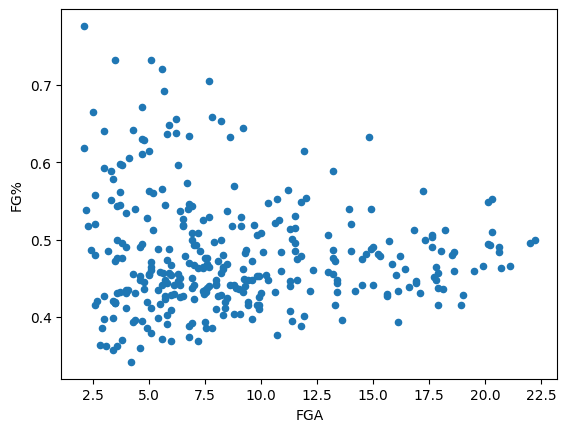

In [94]:
active_player_df.plot(x='FGA',y='FG%',kind='scatter',xlabel='FGA',ylabel='FG%');

Overall, there doesn't seem to be much of a strong relationship between FGA and FG%. The lower the FGA, the more variability in FG%. This makes sense given that the lower the shots taken, the more difference in percentage a shot made or missed makes. As FGA increase, FG% seems to stabilize more around 45% or so.

<Axes: xlabel='FGA', ylabel='FG%'>

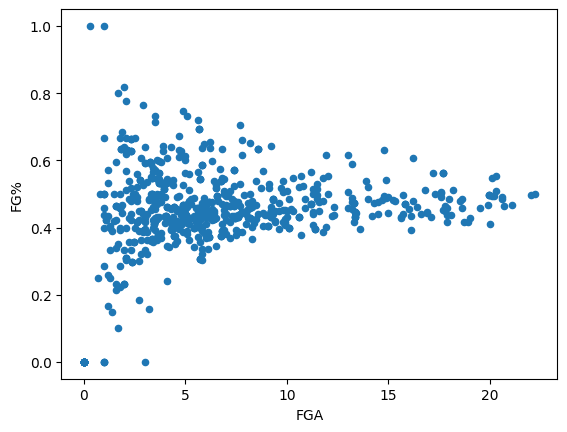

In [95]:
player2023_df.plot(x='FGA',y='FG%',kind='scatter',xlabel='FGA',ylabel='FG%')

Much greater variability, but a more obvious trend toward the mean FG% as FGA increase.

Interactive Plot

In [96]:
fig = px.scatter(active_player_df,x='FGA',y='FG%',hover_name='Player',hover_data=['Pos'],title='Player Volume and Accuracy',color='Pos',size='PTS')
fig.add_hline(active_player_df['FG%'].mean()+active_player_df['FG%'].std())
fig.add_vline(active_player_df['FGA'].mean()+active_player_df['FGA'].std())
fig.add_hline(active_player_df['FG%'].mean(),line_color='red',line_dash='dash')
fig.add_vline(active_player_df['FGA'].mean(),line_color='red',line_dash='dash')
#fig.update_layout(hovermode='x')
fig.show()

In [97]:
fig = px.scatter(player2023_df,x='FGA',y='FG%',hover_name='Player',hover_data=['Pos'],title='Player Volume and Accuracy',color='Pos',size='PTS')
fig.add_hline(player2023_df['FG%'].mean()+player2023_df['FG%'].std())
fig.add_vline(player2023_df['FGA'].mean()+player2023_df['FGA'].std())
fig.add_hline(player2023_df['FG%'].mean(),line_color='red',line_dash='dash')
fig.add_vline(player2023_df['FGA'].mean(),line_color='red',line_dash='dash')
#fig.update_layout(hovermode='x')
fig.show()

In [98]:
active_player_df['FG%'].mean(), active_player_df['FG%'].std()

(0.47992558613659536, 0.07369706851999153)

In [99]:
active_player_df['FG%'].mean()+active_player_df['FG%'].std()

0.5536226546565869

In [100]:
cond1 = active_player_df['FGA']>(active_player_df['FGA'].mean() + active_player_df['FGA'].std())
cond2 = active_player_df['FG%']> (active_player_df['FG%'].mean() + active_player_df['FG%'].std())

active_player_df[cond1 & cond2].sort_values(by='YAHOO',ascending=False)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
78,Anthony Davis,C,56.0,54.0,34.0,9.7,17.2,0.563,0.3,1.3,0.257,9.3,15.9,0.589,0.573,6.2,7.9,0.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9,10.256933,17.059323,7.035417,0.6735
176,Nikola Jokić,C,69.0,69.0,33.7,9.4,14.8,0.632,0.8,2.2,0.383,8.5,12.7,0.675,0.660,4.9,6.0,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,9.206620,16.173815,3.315890,0.7270


In [101]:
active_player_df['FG%'].mean() + active_player_df['FG%'].std()

0.5536226546565869

In [102]:
get_player('Kevin Durant')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%


In [103]:
fig = px.scatter(active_player_df,x='FGA',y='PTS',hover_name='Player',hover_data=['Pos'],title='Player Volume and PTS',color='Pos')
fig.add_hline(active_player_df['PTS'].mean()+2*active_player_df['PTS'].std())
fig.add_vline(active_player_df['FGA'].mean()+2*active_player_df['FGA'].std())
fig.add_hline(active_player_df['PTS'].mean(),line_color='red',line_dash='dash')
fig.add_vline(active_player_df['FGA'].mean(),line_color='red',line_dash='dash')
#fig.update_layout(hovermode='x')
fig.show()

3P% and 3PA

In [104]:
fig = px.scatter(active_player_df,x='3PA',y='3P%',hover_name='Player',hover_data=['Pos'],title='3P% vs 3PA',color='Pos')
fig.add_hline(active_player_df['3P%'].mean()+active_player_df['3P%'].std())
fig.add_vline(active_player_df['3PA'].mean()+active_player_df['3PA'].std())
fig.add_hline(active_player_df['3P%'].mean(),line_color='red',line_dash='dash')
fig.add_vline(active_player_df['3PA'].mean(),line_color='red',line_dash='dash')
#fig.update_layout(hovermode='x')
fig.show()

In [105]:
active_player_df['2P%'].mean(),active_player_df['3P%'].mean()

(0.5501080530071357, 0.3288399592252803)

In [106]:
get_player('Stephen Curry')['3P%'] * 3

76    1.281
Name: 3P%, dtype: float64

In [107]:
get_player('Stephen Curry')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
76,Stephen Curry,PG,56.0,56.0,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,6.07331,16.0926,1.119359,0.704
